In [29]:
import pandas as pd

from pycaret.classification import ClassificationExperiment

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Trey\Regis\MSDS600 Intro to Data Science\Week 2\Churn_edited.csv')
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charge,TotalCharges_Check
0,7590-VHVEG,1,1,0,0,29.85,29.85,0,29.850000,0.00
1,5575-GNVDE,34,0,1,1,56.95,1889.50,0,55.573529,46.80
2,3668-QPYBK,2,0,0,1,53.85,108.15,1,54.075000,-0.45
3,7795-CFOCW,45,1,1,2,42.30,1840.75,0,40.905556,62.75
4,9237-HQITU,2,0,0,0,70.70,151.65,1,75.825000,-10.25


In [3]:
df_trimmed = df.drop(['avg_charge','TotalCharges_Check'],axis=1)
df_trimmed

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,1,0,0,29.85,29.85,0
1,5575-GNVDE,34,0,1,1,56.95,1889.50,0
2,3668-QPYBK,2,0,0,1,53.85,108.15,1
3,7795-CFOCW,45,1,1,2,42.30,1840.75,0
4,9237-HQITU,2,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,0,1,1,84.80,1990.50,0
7028,2234-XADUH,72,0,1,3,103.20,7362.90,0
7029,4801-JZAZL,11,1,0,0,29.60,346.45,0
7030,8361-LTMKD,4,0,0,1,74.40,306.60,1


In [4]:
automl = ClassificationExperiment()

In [5]:
automl.setup(df_trimmed,target='Churn')

,Description,Value
0,Session id,4474
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 8)"
4,Transformed data shape,"(7032, 8)"
5,Transformed train set shape,"(4922, 8)"
6,Transformed test set shape,"(2110, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [6]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7584,0.8045,0.6354,0.5388,0.5829,0.4146,0.4175,0.0310
knn,K Neighbors Classifier,0.7568,0.7321,0.4152,0.5566,0.4751,0.3214,0.3274,0.0440
svm,SVM - Linear Kernel,0.7351,0.0000,0.4741,0.5783,0.4786,0.3198,0.3475,0.0390
lr,Logistic Regression,0.7343,0.8311,0.0000,0.0000,0.0000,0.0000,0.0000,0.9270
dt,Decision Tree Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
ridge,Ridge Classifier,0.7343,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0330
rf,Random Forest Classifier,0.7343,0.6589,0.0000,0.0000,0.0000,0.0000,0.0000,0.1380
qda,Quadratic Discriminant Analysis,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
ada,Ada Boost Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0410
gbc,Gradient Boosting Classifier,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1300


In [7]:
automl.save_model(best_model,'Churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                                        

In [8]:
new_pycaret = ClassificationExperiment()

In [9]:
loaded_model = new_pycaret.load_model('Churn_model')

Transformation Pipeline and Model Successfully Loaded


In [13]:
new_churn = pd.read_csv(r'new_churn_data.csv')
new_churn_trimmed = new_churn.drop('charge_per_tenure',axis=1)
new_churn_trimmed

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,9305-CKSKC,22,1,0,2,97.40,811.70
1,1452-KNGVK,8,0,1,1,77.30,1701.95
2,6723-OKKJM,28,1,0,0,28.25,250.90
3,7832-POPKP,62,1,0,2,101.70,3106.56
4,6348-TACGU,10,0,0,1,51.15,3440.97


In [18]:
y_pred = predictions = loaded_model.predict(new_churn_trimmed)

In [19]:
y_true = [1,0,0,1,0]

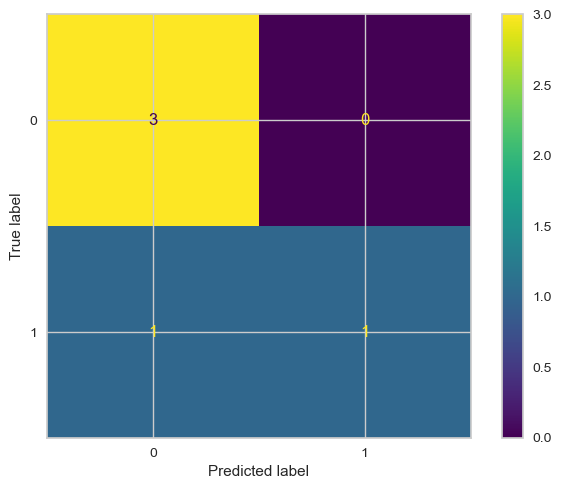

In [33]:
cm = (confusion_matrix(y_true,y_pred))
disp = ConfusionMatrixDisplay(cf)
disp.plot()
plt.show()


In [34]:
loaded_model.predict_proba(new_churn_trimmed)

array([[0.39748013, 0.60251987],
       [0.84129148, 0.15870852],
       [0.50092518, 0.49907482],
       [0.90360114, 0.09639886],
       [0.52941736, 0.47058264]])